 Data Sci Final Project

<b>Keyword<b> <br>
Recomendation Systen<br>
Customer Segmention

In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from scipy.stats import norm
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

### Index <br>
1. Data Preparation <br>
2. Exploratory Data Analysis <br>

### Data Preparation

In [2]:
# Set Current Directory
currentPath = os.getcwd()
subFolder = "/ml-100k/"
os.chdir(currentPath+subFolder)

In [3]:
def ImportFile(fileName,feature,sep,crange):
    if sep == None:
        sep = '|'
    if crange == None:
        df = pd.read_csv(fileName, sep=sep,names=feature,encoding='latin-1')
    else:
        df = pd.read_csv(fileName, sep=sep,names=feature,usecols=range(crange),encoding='latin-1')
    return df

In [4]:
userFeature = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
usersDf = ImportFile('u.user',userFeature,None,None)
print('total user : ',len(usersDf))
usersDf.head()

total user :  943


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
ratingFeature = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratingDf = ImportFile('u.data',ratingFeature,'\t',4)
print('total user rating genre : ',len(ratingDf))
ratingDf.head()

total user rating genre :  100000


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
genreFeature = ['genre']
genreDf = ImportFile('u.genre',['genre'],None,1)
print('total genre : ',len(genreDf))
genreDf.head()

total genre :  19


,genre
0,unknown
1,Action
2,Adventure
3,Animation
4,Children's


In [7]:
moviesFeature = ['movie_id', 'title', 'release_date', 'video_release_date','imdb_url']
moviesFeature = moviesFeature+genreDf['genre'].values.tolist()
moviesDf = ImportFile('u.item',moviesFeature,None,len(moviesFeature))
moviesDf.head()

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Data Cleansing

Convert release_date to date , year ,month

In [8]:
moviesDf['date'] = pd.to_datetime(moviesDf['release_date'])
moviesDf['year'] = (moviesDf['date'].dt.year)
moviesDf['month'] = (moviesDf['date'].dt.month)
moviesDf[['year','month']] = moviesDf[['year','month']].fillna(0)

In [9]:
moviesDf['month'] = moviesDf['month'].astype(int)
moviesDf['year'] = moviesDf['year'].astype(int)
moviesFeature = moviesFeature + ['date','year','month']

In [10]:
moviesDf[['movie_id','title','date','year','month']].head()

,movie_id,title,date,year,month
0,1,Toy Story (1995),1995-01-01,1995,1
1,2,GoldenEye (1995),1995-01-01,1995,1
2,3,Four Rooms (1995),1995-01-01,1995,1
3,4,Get Shorty (1995),1995-01-01,1995,1
4,5,Copycat (1995),1995-01-01,1995,1


Remove release year from title

In [11]:
newTitle = []
for c in moviesDf['title']:
    nc = c.split()
    title =''
    for i in range(0,len(nc)-1):
        if i != 0:
            title = title+' '+nc[i]
        else:
            title = title+nc[i]     
    newTitle.append(title)

In [19]:
moviesDf['title'] = newTitle
moviesDf[['movie_id','title','date','year','month']].head()

,movie_id,title,date,year,month
0,1,Toy Story,1995-01-01,1995,1
1,2,GoldenEye,1995-01-01,1995,1
2,3,Four Rooms,1995-01-01,1995,1
3,4,Get Shorty,1995-01-01,1995,1
4,5,Copycat,1995-01-01,1995,1


### One-Hot-Encoding

## Exploratory Data Analysis

แสดงการกระจายของ User ตามช่วงอายุ

Text(0,0.5,'User Amount')

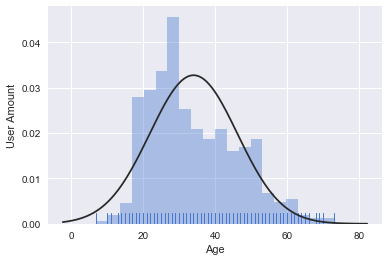

In [13]:
sns.set_color_codes("muted")
sns.distplot(usersDf.age,bins=20,fit=norm,kde=False,rug=True,color="b")
plt.xlabel('Age');
plt.ylabel('User Amount')

นับจำนวน User ในแต่ละอาชีพ

In [14]:
occupationDict = dict()
occupations = usersDf['occupation'].unique()
for occupation in occupations:
    occupationDict[occupation] = len(usersDf.loc[usersDf['occupation'] == occupation])

แสดงจำนวน User โดยแยกตามอาชีพ

In [15]:
occupationDf = pd.DataFrame.from_dict(occupationDict, orient = 'index')
occupationDf.columns = ['amount']
print('user ',occupationDf.sum())
occupationDf.sort_values('amount')

user  amount    943
dtype: int64


,amount
doctor,7
homemaker,7
none,9
lawyer,12
salesman,12
retired,14
healthcare,16
entertainment,18
marketing,26
technician,27


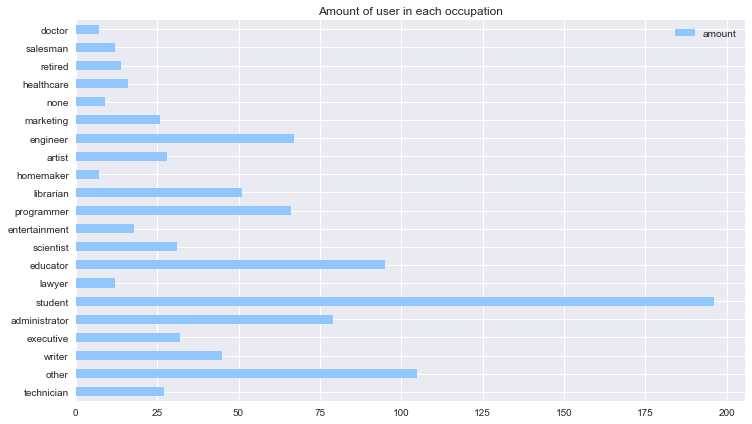

In [16]:
fig, ax = plt.subplots()
sns.set_color_codes("pastel")
occupationDf.plot.barh(y='amount',ax=ax,figsize=(12, 7),color='b',
                      title='Amount of user in each occupation')

In [37]:
sexDict = dict()
sexs = usersDf['sex'].unique()
for sex in sexs:
    sexDict[sex] = len(usersDf.loc[usersDf['sex'] == sex])
    
sexDf = pd.DataFrame.from_dict(sexDict, orient = 'index')
sexDf.columns = ['amount']
print('user ',sexDf.sum())
sexDf

user  amount    943
dtype: int64


,amount
M,670
F,273


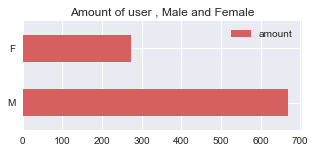

In [39]:
fig, ax = plt.subplots()
sns.set_color_codes("muted")
sexDf.plot.barh(y='amount',ax=ax,figsize=(5,2),color='r',
                      title='Amount of user , Male and Female')

In [40]:
usersDf

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [57]:
usersDf.iloc[:,0:4].head()

,user_id,age,sex,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [59]:
pd.get_dummies(usersDf.iloc[:,0:4])

,user_id,age,sex_F,sex_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,53,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,23,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,33,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,6,42,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,57,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,36,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,29,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,10,53,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
